<a href="https://colab.research.google.com/github/baharuluss/CNN_Clothes_Classification/blob/main/CNN_Algoritmas%C4%B1_ile_Giysi_S%C4%B1n%C4%B1fland%C4%B1rmas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Evrişimsel Sinir Ağları (CNN) Kullanarak Giysi Sınıflandırması
## Kodlama öncesi bilinmesi gereken bazı terimler:
 * **CNNs:** CNN (Convolutional Neural Network), özellikle görsel veriler üzerinde başarıyla çalışan bir derin öğrenme (deeplearning) modelidir. Temel olarak, bir görsel hiyerarşiyi öğrenmek ve görsel verilerde desenleri algılamak için tasarlanmıştır. CNN'ler, özellikle Bilgisayarlı Görü (Computer Vision) alanında geniş bir kullanım alanına sahiptir.

* **Convolutional Layers:** CNN'ler, konvolüsyon (Convolution) katmanları içerir. Bu katmanlar, girdi verileri üzerinde belirli desenleri algılamak ve öğrenmek için kullanılır. Konvolüsyon işlemi, bir filtre (Kernel) ile girdi veri üzerinde kaydırma (Stride) işlemi yaparak özellik haritası çıkarır.

* **Padding:** CNN gibi derin öğrenme modellerinde konvolüsyon işlemeleri sırasında giriş verisinin kenarlarına eklenen ekstra piksellerdir. Bu, çıkış boyutunu kontrol etmek ve kenar piksellerini daha iyi işlemek için kullanılır. Padding işlemi, genellikle sıfırlarla doldurulan ek piksellerin eklenmesini içerir.

* **Pooling:** CNN'ler genellikle pooling katmanları içerir. Pooling, özellik haritalarının boyutunu küçültmek ve öğrenilecek parametre sayısını azaltmak için kullanır. Maxpooling ve average pooling yaygın olarak kullanılan tekniklerdir.

* **Maxpooling:** MaxPooling (Maksimum Havuzlama), Evrişimsel Sinir Ağları (CNNs) gibi derin öğrenme modellerinde sıkca kullanılan bir katman türüdür. Maxpooling, özellik haritalarındaki özellikleri örneklerken, her bölge içindeki maksimum değeri seçer ve bu değeri kullanılır. Bu işlem, özellik haritasını örnekleme yaparak boyutunu küçültmek ve önemli özellikleri örneklemek için kullanır.

* **Stride:** Stride (Kaydırma), Evrişimsel Sinir Ağları (CNNs) gibi derin öğrenme modellerinde kullanılan konvelüsyon işlemi sırasında filtrenin giriş verisi üzerinde kaymasını belirleyen parametredir. Stride değeri, filtre veya kernelin giriş verisi üzerinde her adımda ne kadar kaymasını gerektiğini belirtir.

* **Downsampling:** Downsampling, Evrişimsel Sinir Ağları (CNNs) veya diğer bir öğrenme modellerinde, özellik haritasının boyutunu küçültme işlemine denir. Bu işlem, genelikle pooling katmanları veye stride parametresi kullanılarak gerçekleştirilir.
tf ve tfds: tf TensorFlow kütüphanesini, tfds ise TensorFlow Datasets kütüphanesini temsil eder. TensorFlow, derin öğrenme ve makine öğrenmesi uygulamaları geliştirmek için kullanılan popüler bir açık kaynaklı kütüphanedir. tfds ise TensorFlow'un veri kümesi yükleme işlemlerini kolaylaştıran bir modüldür.

* **tf.keras.Sequential:** Bu, sıralı katmanlar içeren bir model oluşturmak için kullanılan TensorFlow'un Keras API'sindeki bir sınıftır. Bu model tipi, katmanları sıralı bir şekilde ekleyerek bir sinir ağı oluşturmayı sağlar.

* **Flatten:** Bu, giriş verisinin boyutunu düzleştiren bir katmandır. Özellikle görüntü verilerini düzleştirerek, sinir ağına girdi olarak verebilmek için kullanılır.

* **Dense:** Tam bağlı (fully connected) katmanları ifade eder. Her bir nöron, önceki katmandaki tüm çıktıları alır. units parametresi, katmandaki nöron sayısını belirler. activation parametresi, nöronlardan gelen çıktıların aktivasyon fonksiyonunu belirtir.

* **Activation functions:** Aktivasyon fonksiyonları, nöronlardan gelen çıktıların sınırlarını belirleyen matematiksel işlemlerdir. Örneğin, tf.nn.relu ReLU (Rectified Linear Unit) aktivasyon fonksiyonunu ifade eder.

* **SparseCategoricalCrossentropy:** Bu, çoklu sınıflandırma problemlerinde kullanılan bir kayıp fonksiyonudur. Modelin çıktıları ile gerçek etiketler arasındaki farkı ölçer.

* **Adam optimizer:** Adam, öğrenme oranını ayarlamak için adaptif momentlerin kullanıldığı bir optimizasyon algoritmasıdır. Modelin iç parametrelerini güncellemek ve kaybı en aza indirmek için kullanılır.

* **model.compile:** Bu, modelin derleme aşamasını ifade eder. Modelin eğitim için hazır hale getirilmesi için gerekli optimizasyon, kayıp fonksiyonu ve metriklerin belirlendiği aşamadır.

* **model.fit:** Modelin eğitim veri kümesi üzerinde eğitildiği aşamadır. epochs parametresi, eğitimin kaç tam iterasyon (epoch) süreceğini belirtir.

* **cache(), repeat(), shuffle(), batch():** Veri kümesi üzerinde çeşitli ön işleme işlemlerini ifade eder. Örneğin, veriyi önbelleğe alma (cache()), tekrar etme (repeat()), karıştırma (shuffle()), ve mini-batch'lere bölme (batch()) işlemleri.


## Proje için Gerekli Kütüphanelerin Yüklenmesi



In [ ]:
import tensorflow as tf #tensorflow kütüphanesi içeri aktarıldı.bu derin öğrenme ve makine öğrenmesi uygulamaları geliştirmek için kullanılan popüler bir açık kaynak kodlu kütüphanedir.

#tensorflow verisetleri
#kütüphane içeri aktarıldı. Standart veri kümelerine kolayca erişim sağlamamızı ve bu veri kümesini kullanarak modellerimizi eğitmemizi sağlar.
import tensorflow_datasets as tfds
#veri kümesi yüklenirken çıkan progess barı gizler.
tfds.disable_progress_bar()
# math modülünü içe aktarır. Bu modül, matematiksel işlemler için bir dizi fonksiyon sağlar.
import math
# numpy modülünü np takma adıyla içe aktarır. Numpy, bilimsel hesaplamalar için kullanılan güçlü bir kütüphanedir.
import numpy as np
# matplotlib.pyplot modülünü plt takma adıyla içe aktarır. Matplotlib, grafik çizimleri için kullanılan bir kütüphanedir.
import matplotlib.pyplot as plt
# logging modülünü içe aktarır. Bu modül, uygulama üzerinde loglama yapmak için kullanılır.
import logging
# Tensorflow'un get_logger fonksiyonunu kullanarak bir logger (günlük) oluşturur.
logger= tf.get_logger()
# Logger'ın seviyesini ERROR seviyesine ayarlar. Bu, sadece hata mesajlarını görüntülemesini sağlar.
logger.setLevel(logging.ERROR)

##Fashion-Mnist Veri Setinin Yüklenmesi





In [ ]:
#'fashion_mnist' veri setini yükler ve ilgili bilgileri 'metadata' değişkenine atar
dataset, metadata = tfds.load('fashion_mnist', as_supervised= True, with_info= True)
# Eğitim (train) ve test (test) veri kümelerini ayrıştırır
train_ds, test_ds = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


* tfds.load('fashion_mnist', as_supervised=True, with_info=True): Bu satır, 'fashion_mnist' adlı veri setini yükler. as_supervised=True parametresi, veri setinin eğitim ve etiket verilerini çiftler halinde döndürmesini sağlar. with_info=True parametresi ise veri seti hakkında meta bilgileri (metadata) elde etmenizi sağlar.

* train_ds, test_ds = dataset['train'], dataset['test']: Bu satır, yüklenen veri setini eğitim (train) ve test (test) veri kümelerine ayırır. Bu iki değişken, sırasıyla eğitim ve test veri kümelerini temsil eder. Böylece, train_ds ve test_ds değişkenleri üzerinden Fashion-MNIST veri setine erişebilirsiniz. Bu veri kümeleri, sırasıyla eğitim ve test verilerini içerir ve her bir örnek, görüntü ve etiket çifti olarak kullanılabilir. Bu veri seti, genellikle makine öğrenimi modellerini eğitmek ve değerlendirmek için kullanılan bir görüntü sınıflandırma veri setidir.

In [ ]:
#metadata değişkeni, yüklenen veri setinin meta bilgilerini içerir.Bu meta bilgileri, veri setinin özelliklerini, boyutlarını ve etiket bilgilerini içerir.
# 'label' özelliğinin içindeki 'names' özelliği, veri setindeki sınıf isimlerini içerir.
# Bu satır, sınıf isimlerini 'class_names' değişkenine atar.
class_names = metadata.features['label'].names

#'class_names' değişkenindeki sınıf isimlerini ekrana yazdırır.
# format() fonksiyonu ile '{}' içine 'class_names' değişkeni yerleştirilir.
# Bu satır, ekrana "Class names: [sınıf1, sınıf2, ...]" şeklinde bir çıktı verir.
print('Class names: {}'.format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Veri Setimizdeki Eğitim ve Test Setindeki Görsel Sayısını Öğrenmek

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of images in train set: {}'.format(num_train_examples))
print('Number of images in test set: {}'.format(num_test_examples))

Number of images in train set: 60000
Number of images in test set: 10000


## Görüntüleri [0,1] Aralığında Normalize Ederek Veri Kümesini Ön İşleme Yapma

Bu işlem, piksel değerlerini normalize etmek için kullanılır, bu da modelin daha iyi öğrenmesine yardımcı olabilir.

In [ ]:
def normalize(images, labels):
  # Görüntü piksel değerlerini float32 türüne dönüştürür.
  images = tf.cast(images, tf.float32)
  # Görüntü piksel değerlerini [0,1] aralığına normalize eder.
  images /= 255
  # Normalize edilmiş görüntüler ve etiketleri döndürür.
  return images, labels

Eğitim veri kümesini normalize etme ve önbelleğe alma

In [ ]:
#Eğitim veri kümesine normalize işlemlerini uygular.
train_ds = train_ds.map(normalize)
#Test veri kümesine normalize işlemini uygular.
test_ds = test_ds.map(normalize)

Veri Kümesini Bellekte Önbelleğe Alma

In [ ]:
#Eğitim veri kümesini önbelleğe alır,böylece daha hızlı eğitim yapabilir.
train_ds = train_ds.cache()
#Test veri kümesini önbelleğe alır.
test_ds = test_ds.cache()

İşlenen Veri Kümesini Keşfetme
Tek Bir Görüntü ile Görselleştirme

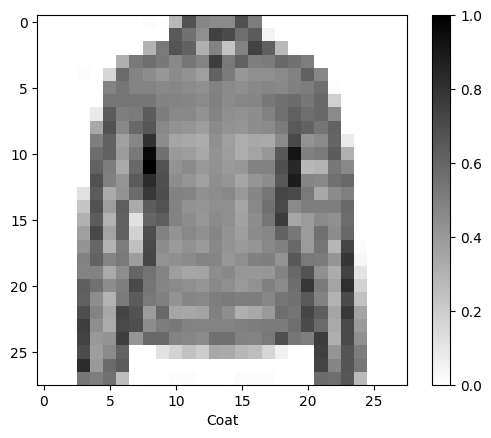

In [ ]:
#test_ds'ten bir görüntü ve etiketi alma işlemi
for image, label in test_ds.take(1):
  break
#Görüntüyü numpy dizinine dönüştürülmesi ve boyutunun(28*28) olarak yeniden şekillendirilmesi işlemi
image = image.numpy().reshape((28,28))
#Yeni bir çizim penceresi oluşturma
plt.figure()
#Görüntüyü siyah-beyaz renk haritasıyla görselleştirme işlemi
plt.imshow(image, cmap=plt.cm.binary)
#Renk çubuğu ekleme işlemi
plt.colorbar()
#Izgara çizgilerini kaldırma işlemi
plt.grid(False)
#Eksen etiketlerini ayarlama işlemi
plt.xlabel(class_names[label])
#Görüntüyü göster
plt.show()


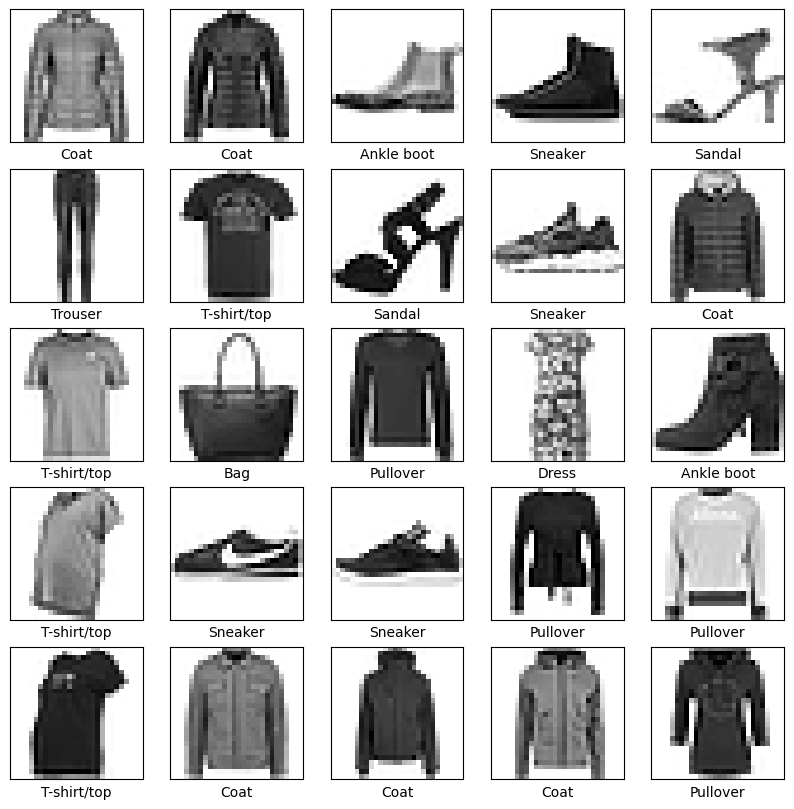

In [ ]:
#Yeni bir çizim penceresi oluşturur ve boyutunu belirler
plt.figure(figsize=(10, 10))
#test_ds üzerinde iterasyon yaparak 25 örneği görselleştirme işlemi
for i, (image, label) in enumerate(test_ds.take(25)):
  #görüntüyü numpy dizisine dönüştürme ve boyutunu(28*28) olarak yeniden şekillendirme işlemi
  image=image.numpy().reshape((28,28))
  #5x5 bir alt çizim penceresi oluşturma ve görselleştirmeyi yerleştirme işlemi
  plt.subplot(5, 5, i + 1)
  #Eksen işaretlerini kapatma işlemi
  plt.xticks([])
  plt.yticks([])
  #ızgara çizgilerini kaldırma işlemi
  plt.grid(False)
  #Siyah-beyaz renk haritası ile görüntüyü gösterme işlemi
  plt.imshow(image, cmap=plt.cm.binary)
  #eksen altındaki etiketi, görüntünün gerçek sınıf adıyla ayarlama işlemi
  plt.xlabel(class_names[label])
#çizimi gösterme işlemi
plt.show()



##Modelin Oluşturulması

In [ ]:

# Sequential modeli oluşturur. Katmanları sıralı olarak eklemek için kullanılır
model = tf.keras.Sequential([
    #Giriş katmanı: 28x28 piksel boyutundaki görüntüyü düzleştirir.(1D vektöre çevirir)
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    #Tam bağlı (Dense) katman: 128 nörona sahip, aktivasyon fonksiyonu olarak ReLU (Rectified Linear Unit) kullanılır.
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    #Çıkış katmanı: 10 nörona sahip, aktivasyon fonksiyonu olarak softmax kullanılır. Çoklu sınıflandırma problemlerinde kullanılır.Bu her bir sınıf için olasılık dağılımını üretir
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])


Bu ağ üç katmana sahiptir.

* Input (Giriş):Bu katman, 28 X 28 piksel boyutundaki 2D dizi görüntülerini, 1D 784 piksel (28*28) dizisine dönüştürmek için kullanılır.

* Hidden (Gizli):128 nöronlu yoğun bir katmandır. Her bir nöron, önceki katmandaki 784 düğümden gelen girişi alır, eğitim sırasında öğrenilecek olan gizli parametrelere göre ağırlıklandırır ve bir sonraki katmana tek bir değer çıkarır.

* Output (Çıkış):Bu, 10 düğmeli softmax çıkış katmanıdır. Her bir düğüm, bir giyim sınıfını temsil eder. Önceki katmandaki 128 düğümden gelen girişi alır ve görüntünün o sınıfa ait olma olasılığını temsil eden [0,1] aralığında bir değer çıkarır. 10 düğümün tüm değerlerinin toplamı 1'dir.









##Modeli Derleme İşlemi
Modeli eğitmeye başlamadan önce, modelin derleme adımında birkaç şey eklememiz gerekiyor.
* Loss Function (Kayıp Fonksiyonu): Modelin çıktılarının istenilen çıktıdan ne kadar uzak olduğunu ölçen bir algoritma. Bu kaybı ölçme amacına hizmet eder.
* Optimizer (Optimizasyon): Modelin iç parametrelerini ayarlamak için kullanılan bir algoritma, kaybı en aza indirmek amacıyla kullanılır.
*  Metrics (Metrikler): Eğitim ve test adımlarını izlemek için kullanılır. Aşağıda doğruluk (accuracy) metriğini, ölçeceğiz.



In [ ]:
#Modeli derleme
model.compile(optimizer = 'adam',#Optimizasyon algoritması olarak Adam kullanılır.
            #Kayıp fonksiyonu olarak 'sparse_categorical_crossentropy' kullanılır.
            loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

##Modeli Eğitme
İlk olarak, eğitim veri kümesi için tekraralama davranışını tanımlıyoruz.

* 'dataset.repeat()', sonsuz bir şekilde tekrarlamayı sağlar.
* 'dataset.shuffle(60000)', örneklerin sırasından öğrenmeyi engellemek için örnekleri karıştırır.
* 'dataset.batch(32)', modelin değişkenlerini güncellerken 32 görüntü ve etiket kullanmasını model.fit'e belirtir.

In [ ]:

BATCH_SIZE = 32
# Eğitim veri kümesini ön belleğe al, tekrarla, karıştır ve belirtilen BATCH_SIZE ile mini-batch'ler oluştur
train_ds = train_ds.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
# Test veri kümesini ön belleğe al ve belirtilen BATCH_SIZE ile mini-batch'ler oluştur
test_ds = test_ds.cache().batch(BATCH_SIZE)


Eğitim, model.fit yöntemi kullanılarak gerçekleştirilir:

* Modeli,train_dataset  kullanarak besliyoruz.
* Model, görüntüleri ve etiketleri ilişkilendirmeyi öğrenir.
* epoch=5 parametresi, eğitimi 5 tam iterasyon ile sınırlar, bu da toplamda 60000*5 = 300000 örneği içerir.

In [ ]:
# Modeli eğitim veri kümesi (train_ds) üzerinde 5 epochs boyunca eğittik.
# Her bir epoch'ta, mini-batch'ler halinde eğitim veri setini geç ve
# toplam adım sayısını belirtmek için steps_per_epoch parametresini kullan.
model.fit(train_ds, epochs = 5, steps_per_epoch= math.ceil(num_train_examples/BATCH_SIZE))


Epoch 1/5
1875/1875 [==============================] - 15s 3ms/step - loss: 1.0792 - accuracy: 0.6648
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6417 - accuracy: 0.7691
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5628 - accuracy: 0.7984
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5160 - accuracy: 0.8182
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4881 - accuracy: 0.8277



Bu sefer modelimizi CNN kullanarak eğittiğimizde, modelimiz yaklaşık %82'lık bir doğruluk elde etti ki bu, önceki %66'lik doğruluktan daha yüksek. Dolayısıyla, CNN'ler önceki basit modelimize göre çok daha iyi sonuçlar veriyor.

##Doğruluk Değerlendirmesi
Test veri setindeki tüm örnekleri kullanarak modelimizin test verilerindeki performansına bakıyoruz.

In [ ]:
#Test veri kümesi (test_ds) üzerinde modelin performansını değerlendir.
# steps parametresi, tüm test veri kümesini geçmek için kullanılacak mini-batch sayısını belirtir.
test_loss, test_accuracy = model.evaluate(test_ds, steps = math.ceil(num_test_examples/BATCH_SIZE))
# Test veri kümesinde elde edilen doğruluk sonucunu ekrana yazdır.
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.5054 - accuracy: 0.8204
Accuracy on test dataset: 0.8203999996185303


##Tahminlerde Bulunma ve Sonuçlarla İlgili Önizleme
Modeli eğittik, şimdi onu bazı görüntüler hakkında tahminler yapması için kullanıp, sonuçlar hakkında fikir sahibi oluyoruz.

In [ ]:
# Birinci mini-batch'i test veri kümesinden al, bu örnekler üzerinde işlem yap.
for test_images, test_labels in test_ds.take(1):
  # TensorFlow tensor objelerini numpy dizilerine dönüştür.
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  # Modeli kullanarak test görüntüleri üzerinde tahminler yap.
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 90ms/step


In [ ]:
# 'predictions.shape' komutu, modelin yaptığı tahminlerin şeklini döndürür.
# Bu genellikle (örnek_sayısı, sınıf_sayısı) şeklinde olacaktır,
# burada her bir örnek için modelin her sınıfa ait tahmin değerlerini içerir.
predictions.shape


(32, 10)

In [ ]:
# 'predictions.shape' komutu, modelin yaptığı tahminlerin şeklini döndürür.
# Bu genellikle (örnek_sayısı, sınıf_sayısı) şeklinde olacaktır,
# burada her bir örnek için modelin her sınıfa ait tahmin değerlerini içerir.
predictions[0]

array([7.00197066e-04, 1.14217622e-03, 1.55669749e-01, 2.52821716e-04,
       7.28009939e-01, 1.26525606e-06, 1.10990874e-01, 4.27266889e-09,
       3.23286979e-03, 6.14201170e-08], dtype=float32)


Yukarıdaki tahmin, modelin her biri farklı giyim eşyasına karşılık geldiğine dair prediction'u (güven) açıklayan 10 sayıdan oluşan bir diziyi ifade eder. Burada en yüksek prediction'u (güven) değerine sahip etiketi görebiliriz.

In [ ]:
# predictions[0] dizisindeki en yüksek değere sahip olanın dizinini bulma
np.argmax(predictions[0])

4

Model, bu görüntünün ceket veya class_names[4] olduğuna dair en yüksek güvene sahip. Doğruluğunu kontrol etmek için test etiketini kontrol edebiliriz:

In [ ]:
# Test veri kümesindeki ilk örneğin gerçek etiketi
test_labels[0]

4

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
   # Belirli bir indeksteki tahmin dizisi, gerçek etiket ve görüntüyü al
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  # Izgarayı kapat, x ve y eksenlerini görüntüleme
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  # Görüntüyü siyah-beyaz olarak göster
  plt.imshow(img[...,0], cmap = plt.cm.binary)
  # Tahmin edilen etiketi bul ve renk belirleme
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'# doğru tahminse mavi
  else:
    color = 'red'# yanlış tahminse kırmızı

  # Etiket, tahmin doğruluğu ve gerçek etiketi içeren xlabel'ı oluştur
  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                        color = color)

def plot_value_array(i, predictions_array, true_label):
  # Belirli bir indeksteki tahmin dizisi ve gerçek etiketi al
  predictions_array, true_label = predictions_array[i], true_label[i]
  # Izgarayı kapat, x ve y eksenlerini görüntüleme
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  # 10 elemanlı bir çubuk grafiği oluştur, gri renkte
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  # Grafiği [0, 1] aralığında sınırla
  plt.ylim([0, 1])
  # Tahmin edilen etiketi kırmızı, gerçek etiketi mavi yap
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

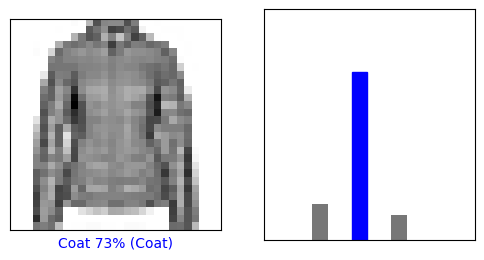

In [ ]:
# İlk görüntüyü seç
i = 0
# 6x3 boyutunda bir figür oluştur
plt.figure(figsize=(6, 3))
# 1 satır, 2 sütunlu alt grafiklerden ilki
plt.subplot(1, 2, 1)
# Seçilen görüntü için tahmin ve gerçek etiketin görselleştirmesini yap
plot_image(i, predictions, test_labels, test_images)
# 1 satır, 2 sütunlu alt grafiklerden ikincisi
plt.subplot(1, 2, 2)
# Seçilen görüntü için tahmin değerlerinin çubuk grafiğini çiz
plot_value_array(i, predictions, test_labels)

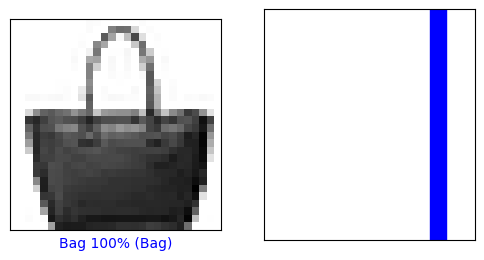

In [ ]:
# 11. indeksteki görüntüyü seç
i = 11
# 6x3 boyutunda bir figür oluştur
plt.figure(figsize=(6, 3))
# 1 satır, 2 sütunlu alt grafiklerden ilki
plt.subplot(1, 2, 1)
# Seçilen 12. görüntü için tahmin ve gerçek etiketin görselleştirmesini yap
plot_image(i, predictions, test_labels, test_images)
# 1 satır, 2 sütunlu alt grafiklerden ikincisi
plt.subplot(1, 2, 2)
# Seçilen 12. görüntü için tahmin değerlerinin çubuk grafiğini çiz
plot_value_array(i, predictions, test_labels)


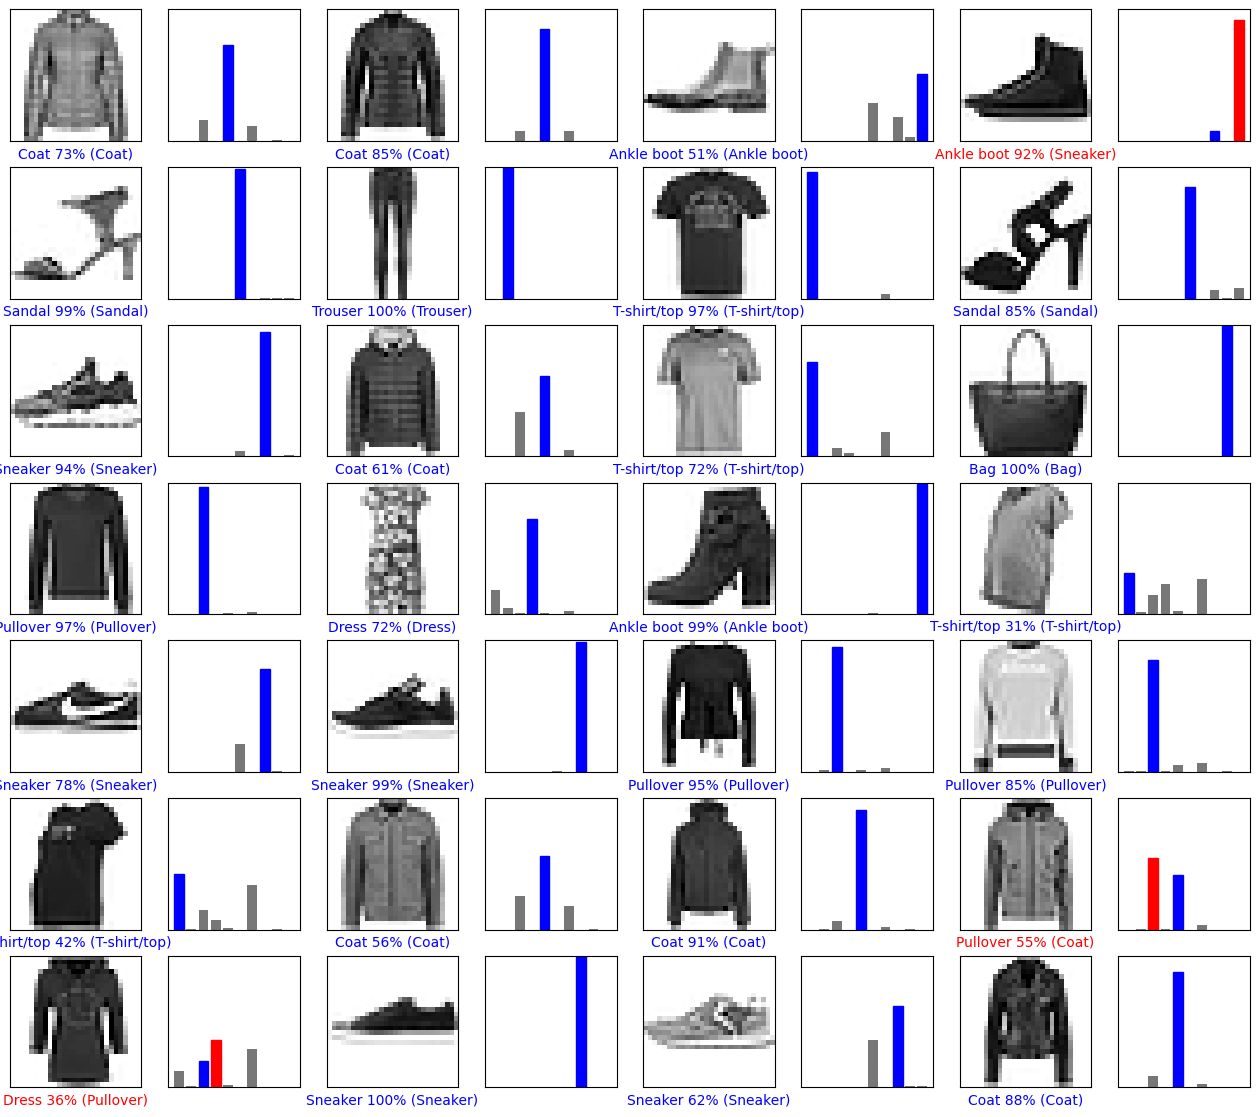

In [ ]:
# Görselleştirmek için kullanılacak satır ve sütun sayılarını tanımla
num_rows = 7
num_cols = 4
num_images = num_rows * num_cols
# Genişlik ve yükseklik ayarlarıyla bir figür oluştur
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
# Belirlenen satır ve sütun sayılarına göre alt grafikleri oluştur
for i in range(num_images):
  # Tek sayıdaki indekslere sahip alt grafiklerde görüntüyü ve tahmin/gerçek etiketi göster
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions, test_labels, test_images)
  # Çift sayıdaki indekslere sahip alt grafiklerde tahmin değerlerini çubuk grafiği olarak göster
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions, test_labels)



Tek bir görüntüyü tahmin edelim:

In [ ]:
# İlk test görüntüsünün şeklini yazdır
img = test_images[0]
# Görüntünün şeklini (boyutlarını) yazdır
print(img.shape)

(28, 28, 1)


In [ ]:
# Görüntüyü, tek elemanlı bir topluluğa ekleyin.
img = np.array([img])
# Görüntüyü bir grup içinde tek eleman olarak ekledik, bu nedenle yeni şekli yazdırıyoruz.
print(img.shape)


(1, 28, 28, 1)


In [ ]:
# Model tarafından tek bir görüntü için tahmin yap
predictions_single = model.predict(img)
# Tek bir görüntü için yapılan tahminleri yazdır
print(predictions_single)


1/1 [==============================] - 0s 112ms/step
[[7.0019730e-04 1.1421751e-03 1.5566982e-01 2.5282195e-04 7.2800988e-01
  1.2652571e-06 1.1099092e-01 4.2726769e-09 3.2328696e-03 6.1420231e-08]]


In [ ]:
# Tek bir görüntü için tahmin değerlerini çubuk grafiği ile görselleştir
plot_value_array(0, predictions_single, test_labels)
# x ekseni etiketlerini sınıf isimleriyle güncelle, 45 derece döndür
_ = plt.xticks(range(10), class_names, rotation=45)


model.predict, her görüntü için bir liste içeren bir liste döndürür. Yalnızca batch içindeki (tek) görüntü için tahminleri alın:

In [ ]:
# Tek bir görüntü için yapılan tahminler içindeki en yüksek değere sahip olan indeksi bul
np.argmax(predictions_single[0])

4

Ve yine, model etiketin 4 coat (ceket) olduğunu tahmin ediyor.